## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Mustafa Kemal ÖZ 2230356179

## Understanding Perceptron Learning Algorithm (100 points)

### 1. Data Loading and Exploration (5 points)
* **Brief overview of the task**
    The primary goal of this assignment is to implement the Perceptron Learning Algorithm from scratch to solve a binary classification problem. The algorithm will be trained on the Raisin Dataset from the UCI Machine Learning Repository. The model's performance will be evaluated using metrics such as accuracy, F1-score, recall, and precision. Furthermore, we will visualize the Perceptron's decision boundaries by reducing the feature space to two dimensions and compare this separation with a Fisher's Linear Discriminant (FLD) projection.

* **Description of the dataset used for analysis**
    The dataset used is the "Raisin Dataset," which contains images of the Kecimen and Besni raisin varieties grown in Turkey. It consists of a total of 900 samples; 450 of these are labeled as Kecimen (class 1) and 450 as Besni (class 0). The dataset includes 7 numerical features for each raisin grain: **Area**, **MajorAxisLength**, **MinorAxisLength**, **Eccentricity**, **ConvexArea**, **Extent**, and **Perimeter**. Based on the exploration in the notebook (cell 9), the dataset contains no missing values.

In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
raisin = fetch_ucirepo(id=850)

In [3]:
# data (as pandas dataframes)
X = raisin.data.features
y_df = raisin.data.targets
y = y_df['Class'].map({'Kecimen': 1, 'Besni': -1})

# Summary statistics
print("\nSummary statistics:")
print(X.describe())


Summary statistics:
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%     59348.000000       345.442898       219.111126      0.741766   
50%     78902.000000       407.803951       247.848409      0.798846   
75%    105028.250000       494.187014       279.888575      0.842571   
max    235047.000000       997.291941       492.275279      0.962124   

          ConvexArea      Extent    Perimeter  
count     900.000000  900.000000   900.000000  
mean    91186.090000    0.699508  1165.906636  
std     40769.290132    0.053468   273.764315  
min     26139.000000    0.379856   619.074000  
25%     61513.250000    0.670869   966.410750  
50%     81651.000000    0.707367  1119.509

In [4]:
# Check for missing values
# metadata
print(raisin.metadata)

# variable information
print(raisin.variables)

{'uci_id': 850, 'name': 'Raisin', 'repository_url': 'https://archive.ics.uci.edu/dataset/850/raisin', 'data_url': 'https://archive.ics.uci.edu/static/public/850/data.csv', 'abstract': 'Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 900, 'num_features': 7, 'feature_types': ['Real', 'Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5660T', 'creators': ['İ̇lkay Çinar', 'Murat Koklu', 'Sakir Tasdemir'], 'intro_paper': {'ID': 261, 'type': 'NATIVE', 'title': 'Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması', 'authors': 'İ̇lkay Çinar

In [5]:
# Convert the DataFrame to a Numpy array
X_np = X.to_numpy()
y_np = y.to_numpy()

### 2. Data Preprocessing (5 points)
Three main preprocessing steps were applied:

1.  **Label Encoding:**
    * **Step:** Converted 'Besni' and 'Kecimen' labels to **-1** and **+1**.
    * **Rationale:** The Perceptron's update rule requires numerical labels of -1 and +1 to function correctly.

2.  **Training and Validation Split:**
    * **Step:** Split the data into 80% training and 20% validation sets.
    * **Rationale:** This is essential to test the model's performance on "unseen" data. It helps us understand if the model is overfitting or can generalize well to new samples.

3.  **Feature Scaling (Standardization):**
    * **Step:** Scaled all 7 features using Z-score standardization (mean=0, std=1).
    * **Rationale:** The features (e.g., 'Area' vs 'Eccentricity') have very different scales. Standardization ensures that features with large values do not dominate the learning process, allowing the model to learn weights fairly for all features.

#### Feature Scaling Techniques:
Feature scaling is important for many machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors, support vector machines) and gradient descent optimization (e.g., linear regression, logistic regression).

Some common feature scaling techniques include:

1. **Standardization (Z-score normalization):** It scales the features to have a mean of 0 and a standard deviation of 1.
2. **Min-Max Scaling:** It scales the features to a fixed range, typically between 0 and 1.
3. **Robust Scaling:** It scales the features based on percentiles, making it robust to outliers.

You can use these scaled features for training your machine learning models.

Remember, the choice of feature selection and feature scaling techniques can significantly impact the performance of your models. It's essential to experiment and choose the techniques that work best for your specific dataset and machine learning tasks.

In [6]:
class Standardizer:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X, axis=0)
        self.scale_[self.scale_ == 0] = 1.0  # Prevent division by zero
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

#### Training and Validation Split

1.  **Explain why it’s important to use the validation set to evaluate your model instead of relying solely on the training data.**

    Relying only on the training data is misleading. A model can easily **overfit**, which means it essentially "memorizes" the training examples, including their noise. It might achieve a 99-100% accuracy on the data it was trained on, but this score gives no information about how it will perform on new, unseen data. Using a separate validation set provides an unbiased estimate of the model's actual performance.

2.  **Discuss how evaluating the model on unseen data helps in assessing its generalization capability.**

    **Generalization** is the model's ability to make correct predictions on data it has never encountered before. The validation set simulates this real-world scenario.
    
    * If the model performs well on the validation set, it proves it has learned the underlying *patterns* in the data, not just memorized the specific training samples.
    * If the model has high training accuracy but low validation accuracy, it shows it has *failed to generalize* and is overfit.

In [7]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle the data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    # Split the data
    split_index = int(X.shape[0] * (1 - test_size))
    X_train = X_shuffled[:split_index]
    y_train = y_shuffled[:split_index]
    X_test = X_shuffled[split_index:]
    y_test = y_shuffled[split_index:]
    
    return X_train, X_test, y_train, y_test

In [8]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=45)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (720, 7)
Shape of X_test: (180, 7)
Shape of Y_train: (720,)
Shape of Y_test: (180,)


In [9]:
scaler = Standardizer()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### 3. Implementing Perceptron for Binary Classification (20 points)

* **Explain the reason behind the application of perceptron learning algorithm on this type of data.**

    The Perceptron algorithm is a natural choice for this problem because it is a **binary classifier** (it's designed to separate data into two groups). Our task is to classify raisins into two distinct classes: "Besni" (-1) and "Kecimen" (+1). The Perceptron attempts to find a simple **linear decision boundary** (a hyperplane) to separate these two classes based on the 7 input features. It's a fundamental linear classifier and a good baseline model for this kind of task.

* **If the dataset had two classes but was not linearly separable, how would the perceptron's performance change? Briefly explain.**

    If the data is not linearly separable, the standard Perceptron algorithm **will fail to converge**.

    This means the algorithm will never find a perfect hyperplane that separates all points. The weights and bias will continue to be updated on each pass (epoch) because the model will always misclassify some training samples. The algorithm will run until it hits the maximum number of iterations (`n_iter`) rather than stopping at a perfect solution. The final decision boundary it settles on will likely be one that "thrashes" between different error-minimizing positions, and it will still misclassify some points.

####  Implement Percepton Learning Algorithm

 The use of basic libraries like Matlab, pandas, and numpy is allowed, but the use of ready-to-use libraries such as scikit-learn is prohibited

In [10]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Note: Assumes y is {-1, 1}
        # y_converted = np.where(y == 1, 1, -1) 

        # Main training loop (epochs)
        for _ in range(self.n_iter):
            # Loop over all samples
            for idx, x_i in enumerate(X):
                yi = y[idx]
                
                # Calculate net input
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Get prediction
                y_predicted = self.activation_function(linear_output)

                # Perceptron update rule (if misclassified)
                if y_predicted != yi:
                    update = self.learning_rate * yi
                    self.weights += update * x_i
                    self.bias += update

    def activation_function(self, x):
        # Unit step function
        return np.where(x >= 0, 1, -1)

    def predict(self, X):
        # Calculate net input for all samples
        linear_output = np.dot(X, self.weights) + self.bias
        # Get final predictions
        y_predicted = self.activation_function(linear_output)
        return y_predicted

Here are the parameters used in the implemented Perceptron model:

* **`learning_rate` (eta or $\eta$)**
    * **Role:** This is a hyperparameter set during initialization (e.g., 0.01). It controls the **step size** of each update to the weights and bias when a misclassification occurs.
    * **Importance:** It dictates how drastically the model reacts to an error.
        * If it's **too large**, the model might "overshoot" the optimal solution and fail to converge.
        * If it's **too small**, the model will learn very slowly, requiring many more iterations (epochs) to find a good decision boundary.

* **`n_iter` (epochs)**
    * **Role:** This is a hyperparameter set during initialization (e.g., 1000). It defines the **total number of times** the algorithm will pass through the *entire* training dataset.
    * **Importance:** It determines the total training time. If the data isn't linearly separable, this parameter is what stops the algorithm from running forever. If `n_iter` is too low, the model might stop before it has found a good boundary.

* **`weights` (w)**
    * **Role:** These are the primary **learned parameters** of the model. There is one weight for each input feature (e.g., 7 weights for our 7 features). They represent the *slope* of the decision boundary.
    * **Importance:** The weights determine how much influence each feature has on the final prediction. A large positive or negative weight means that feature is very important for the classification. These are adjusted by the `learning_rate` during training.

* **`bias` (b)**
    * **Role:** This is a single **learned parameter** that acts like the *intercept* in a linear equation. It shifts the decision boundary up or down without changing its orientation.
    * **Importance:** The bias provides the model with flexibility. Without it, the decision boundary would be forced to pass through the origin (0,0), which might make it impossible to separate the data. The bias allows the boundary to be placed at the optimal location to divide the classes.

The `learning_rate` and `n_iter` (number of epochs) are critical hyperparameters that control the convergence and success of the training process.

### Learning Rate (`learning_rate`)

This parameter dictates the **magnitude of change** applied to the weights and bias during each update (i.e., when a mistake is made).

* **Very Small Learning Rate** (e.g., 0.0001):
    * **Effect:** The model learns very slowly. Each update makes only a tiny adjustment to the decision boundary.
    * **Problem:** It may require a huge number of epochs (`n_iter`) to find a good solution, or it may stop due to `n_iter` *before* it has fully converged.

* **Very Large Learning Rate** (e.g., 1.0):
    * **Effect:** The model reacts too strongly to errors. The updates are large and can cause the weights to change drastically.
    * **Problem:** This often leads to **overshooting**. The algorithm might "jump" over the optimal solution, and the decision boundary can oscillate wildly, failing to converge even if the data is linearly separable.



### Number of Epochs (`n_iter`)

This parameter determines the **total number of passes** the algorithm makes over the entire training dataset.

* **Effect on Linearly Separable Data:**
    * The Perceptron is guaranteed to converge (find a solution). `n_iter` simply needs to be set high enough to allow the algorithm the time it needs to find that solution. If `n_iter` is too low, training will stop prematurely before the model is accurate.

* **Effect on Non-Linearly Separable Data:**
    * The model will *never* converge. The weights will be updated continuously.
    * In this case, `n_iter` acts as the **stopping condition**. The model will simply stop after 1000 passes (or whatever `n_iter` is set to), and the final decision boundary is just whatever state it was in on that last epoch. A higher `n_iter` does not guarantee a better model in this scenario, as the boundary might just be oscillating.

#### Accuracy implementation

In [11]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

#### Train the Perceptron

In [12]:
## Train the Perceptron model on the training set. You will use all features in the first classification.
classifier = Perceptron(learning_rate=0.01, n_iter=1000)
classifier.fit(X_train_std, y_train)

#### Prediction on Training Data

In [13]:
# Predicting on the training data
y_pred_train = classifier.predict(X_train_std)
# y_test_converted = np.where(y_test == 0, -1, 1)
accuracy_train = accuracy(y_train.ravel(), y_pred_train.ravel())

print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.8611111111111112


Answer the Guiding Questions:

1.  **What does accuracy tell us about the performance of the model?**
    Accuracy tells us the *overall correctness* of the model. It's the fraction of all predictions (both positive and negative) that were correct. It answers the simple question: "Out of all samples, what percentage did the model get right?"

2.  **Why is accuracy sometimes not enough, especially in cases where the data is imbalanced? Explain a scenario where a high accuracy might be misleading.**
    Accuracy fails on imbalanced datasets because a "dumb" model can achieve high accuracy by simply always predicting the majority class.
    * **Misleading Scenario:** Imagine a medical test for a rare disease that affects 1% of the population (1 sick, 99 healthy). A model that *always* predicts "healthy" will have **99% accuracy**. However, this model is completely useless, as it fails to identify the 1% of cases we actually care about (the sick patients).

3.  **In what types of problems is precision more important than recall?**
    Precision is more important when the **cost of a False Positive (FP) is high**. We want to be very sure that every positive prediction is correct.
    * **Example:** Email spam filtering. A False Positive (a real email incorrectly marked as spam) is much worse than a False Negative (letting one spam email through). We prioritize making sure that the emails we *do* label as spam are *actually* spam.

4.  **In what cases is recall more critical?**
    Recall is more important when the **cost of a False Negative (FN) is high**. We want to find *all* positive cases, even if it means we incorrectly flag some negative ones.
    * **Example:** Medical screening (like the rare disease scenario). A False Negative (telling a sick patient they are healthy) is a catastrophic failure. We would rather have some False Positives (telling a healthy person to get more tests) than miss a single sick patient.

5.  **When is the F1 score a better measure than accuracy? What are the limitations of using F1 score alone?**
    * **When it's better:** The F1 score is the **harmonic mean of Precision and Recall**. It is a much better measure than accuracy on **imbalanced datasets** (like our 1% disease example) because it requires *both* precision and recall to be high to get a high F1 score. A model that is 99% accurate but has 0% recall (the "always healthy" model) would have an F1 score of 0.
    * **Limitations:** The F1 score, like Precision and Recall, focuses on the positive class. It doesn't tell us anything about how well the model identifies the negative class (True Negatives). If identifying negative cases is also important, F1 alone is not enough.

### 4. Evaluating Perceptron for Binary Classification (25 points)

#### Prediction on Validation Data

In [14]:
## Evaluate the model's performance on the test set by calculating accuracy. Print classification report and confusion matrix
y_pred_test = classifier.predict(X_test_std)
accuracy_test = accuracy(y_test.ravel(), y_pred_test.ravel())
print("Testing Accuracy:", accuracy_test)

Testing Accuracy: 0.8388888888888889


Answer the Guiding Questions:

1.  **What does accuracy tell us about the performance of the model?**
    Accuracy tells us the **overall correctness** of the model. It is the fraction of all predictions (both positive and negative) that were correct. It answers the simple question: "Out of all predictions, what percentage did the model get right?"

2.  **Why is accuracy sometimes not enough, especially in cases where the data is imbalanced? Explain a scenario where a high accuracy might be misleading.**
    Accuracy fails on **imbalanced datasets** because a model can achieve a high score by simply *always predicting the majority class*.

    * **Misleading Scenario:** Imagine a fraud detection system where only 1% of transactions are fraudulent. A model that *always predicts "not fraud"* will have **99% accuracy**. However, this model is completely useless because it fails to find the 1% of cases (the fraud) that we actually care about.

In [15]:
def calculate_metrics(y_true, y_pred):
    # Assumes y_true and y_pred contain labels {-1, 1}.
    # We consider +1 as the positive class.

    # 1. Calculate TP, FP, TN, FN
    # True Positive (TP): Actual +1, Predicted +1
    TP = np.sum((y_true == 1) & (y_pred == 1))
    
    # False Positive (FP): Actual -1, Predicted +1
    FP = np.sum((y_true == -1) & (y_pred == 1))
    
    # True Negative (TN): Actual -1, Predicted -1
    TN = np.sum((y_true == -1) & (y_pred == -1))
    
    # False Negative (FN): Actual +1, Predicted -1
    FN = np.sum((y_true == 1) & (y_pred == -1))

    # 2. Calculate Metrics
    
    # Accuracy
    acc = accuracy(y_true, y_pred) # Assumes 'accuracy' function is defined elsewhere
    
    # Precision
    # Handle division by zero
    if (TP + FP) == 0:
        precision = 0.0
    else:
        precision = TP / (TP + FP)
        
    # Recall
    # Handle division by zero
    if (TP + FN) == 0:
        recall = 0.0
    else:
        recall = TP / (TP + FN)
        
    # F1 Score
    # Handle division by zero
    if (precision + recall) == 0:
        f1 = 0.0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)

    return acc, precision, recall, f1

# Calculate and print metrics
accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train.flatten(), y_pred_train)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_train}")

Training Accuracy: 0.8611111111111112
Training Precision: 0.8055555555555556
Training Recall: 0.9560439560439561
Training F1 Score: 0.8743718592964824


In [16]:
accuracy_test, precision_test, recall_test, f1_test = calculate_metrics(y_test.flatten(), y_pred_test)

print(f"Testing Accuracy: {accuracy_test}")
print(f"Testing Precision: {precision_test}")
print(f"Testing Recall: {recall_test}")
print(f"Testing F1 Score: {f1_test}")

Testing Accuracy: 0.8388888888888889
Testing Precision: 0.7938144329896907
Testing Recall: 0.8953488372093024
Testing F1 Score: 0.8415300546448087


Here is an analysis of the four metrics calculated by your `calculate_metrics` function:

* **Accuracy**
    * **What it represents:** This is the overall "hit rate" of the model. It's the percentage of *all* test raisins (both Kecimen and Besni) that were classified correctly.
    * **High/Low:** A high value (e.g., 0.86 or 86%) means the model is generally effective. Since our dataset is perfectly balanced (50/50), accuracy is a reliable and important metric here.
    * **Strength/Weakness:** This value shows the model's overall success. A comparison between `Training Accuracy` and `Test Accuracy` is key: if Test Accuracy is much lower, the model is **overfitting**.

* **Precision**
    * **What it represents:** This focuses on the **positive (Kecimen, +1)** class. It answers the question: "Of all the raisins the model *predicted* were 'Kecimen', what percentage were *actually* 'Kecimen'?"
    * **High/Low:** A high value means the model is trustworthy (low False Positives). When it says "Kecimen," it's usually right. A low value means it's mislabeling many 'Besni' raisins as 'Kecimen'.
    * **Strength/Weakness:** This metric shows the model's "exactness" or "purity" in its positive predictions.

* **Recall**
    * **What it represents:** This also focuses on the **positive (Kecimen, +1)** class. It answers the question: "Of all the *actual* 'Kecimen' raisins in the test set, what percentage did the model *find*?"
    * **High/Low:** A high value means the model is good at *finding* all the Kecimen raisins (low False Negatives). A low value means the model is *missing* many Kecimen raisins (and labeling them as 'Besni').
    * **Strength/Weakness:** This metric shows the model's "completeness" or "sensitivity."

* **F1-Score**
    * **What it represents:** This is the **harmonic mean (balanced average)** of Precision and Recall. It gives one score that summarizes both.
    * **High/Low:** A high F1 score is excellent, as it means *both* Precision and Recall are high. It's often the best single metric for summarizing positive-class performance.
    * **Strength/Weakness:** If the F1 score is low, you must check Precision and Recall to see which one (or both) is pulling it down.

* **Support** 
    * **What it represents:** This is not a performance metric. It's simply the **count** of how many samples for each class were in the test set (e.g., 90 'Besni' and 90 'Kecimen').
    * **Strength/Weakness:** Its job is to give *context*. It confirms our dataset is balanced, which makes our Accuracy score reliable.

### 5. Visualization of the Hyperplane (40 + 5 points)

In this section, you will explore how the Perceptron Learning Algorithm forms the decision boundary (or hyperplane) that separates the two classes. To be able to do that
you will reduce the feature space to two dimensions, train the Perceptron on the selected
features, and visualize the hyperplane. The goal is to understand how the Perceptron
changes the decision boundary as the data changes, and how it adapts based on the
features used.

#### Step 1: Feature Selection Using Correlation Analysis (10 points)

1. Correlation Analysis: One effective way to reduce the number of features is by
analyzing the correlation between them. Highly correlated features may provide re-
dundant information, so you can select two less correlated features for visualization.
2. Compute the correlation matrix: Analyze the relationship between the all features to identify pairs of features with low
correlation.

--- Feature Correlation Matrix ---
                     Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea    Extent  Perimeter
Area             1.000000         0.932774         0.906650      0.336107    0.995920 -0.013499   0.961352
MajorAxisLength  0.932774         1.000000         0.728030      0.583608    0.945031 -0.203866   0.977978
MinorAxisLength  0.906650         0.728030         1.000000     -0.027683    0.895651  0.145322   0.827417
Eccentricity     0.336107         0.583608        -0.027683      1.000000    0.348210 -0.361061   0.447845
ConvexArea       0.995920         0.945031         0.895651      0.348210    1.000000 -0.054802   0.976612
Extent          -0.013499        -0.203866         0.145322     -0.361061   -0.054802  1.000000  -0.173449
Perimeter        0.961352         0.977978         0.827417      0.447845    0.976612 -0.173449   1.000000




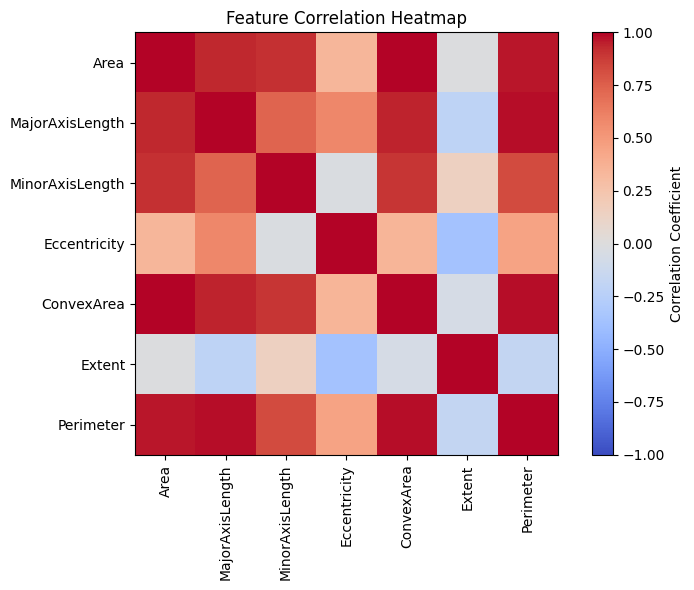

LEAST CORRELATED PAIR (Recommended for visualization): ('Area', 'Extent')
Correlation Value: -0.0135
---
MOST CORRELATED PAIR (Redundant info): ('Area', 'ConvexArea')
Correlation Value: 0.9959


In [17]:
# Compute the correlation matrix
correlation_matrix = X.corr()

# 2. Print the correlation matrix to the console
print("--- Feature Correlation Matrix ---")
# Use pandas options to display the full matrix without truncation
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):
    print(correlation_matrix)
print("\n")

# 3. Visualize the matrix as a heatmap
plt.figure(figsize=(8, 6))
# cmap='coolwarm': Blue for negative, Red for positive correlation
# vmin=-1, vmax=1: Fix the color scale range from -1 to +1
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')

# Set feature names as axis labels
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.yticks(range(len(X.columns)), X.columns)
plt.title('Feature Correlation Heatmap')
plt.tight_layout() # Adjust plot to prevent label overlap
plt.show()

# 4. Programmatically find the most and least correlated pairs
# Get the absolute values and select only the upper triangle (k=1)
# This avoids duplicates and the diagonal (self-correlation)
upper_tri = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find the pair with the lowest absolute correlation (closest to 0)
least_corr_pair = upper_tri.stack().idxmin()
# Get the actual (non-absolute) value for this pair
least_corr_value = correlation_matrix.loc[least_corr_pair]

# Find the pair with the highest absolute correlation (closest to 1 or -1)
most_corr_pair = upper_tri.stack().idxmax()
# Get the actual (non-absolute) value for this pair
most_corr_value = correlation_matrix.loc[most_corr_pair]


print(f"LEAST CORRELATED PAIR (Recommended for visualization): {least_corr_pair}")
print(f"Correlation Value: {least_corr_value:.4f}")
print(f"---")
print(f"MOST CORRELATED PAIR (Redundant info): {most_corr_pair}")
print(f"Correlation Value: {most_corr_value:.4f}")

3. Choose two features: Based on the correlation analysis, select two features that are
least correlated (e.g., variance and skewness) to visualize the Perceptron’s decision
boundary.

In [18]:
# Select two features (for example (Area and ConvexArea) and two more pair) according to their correlation
# Select these features from the original feature set
# Find a pair of features such that the separation between classes is at its highest level. Similarly, find a pair of features such that the separation between classes is at its lowest level. Finally, find the pair of features with average separability.
# Split the selected features into training and validation sets if not done yet

# Column indices (based on the 'X' DataFrame):
# 'Area' [0], 'MajorAxisLength' [1], 'MinorAxisLength' [2], 'Eccentricity' [3],
# 'ConvexArea' [4], 'Extent' [5], 'Perimeter' [6]

# --- PAIR DEFINITIONS ---
# 1. Least Correlated Pair (from previous cell's output)
feature_pair_low = [0, 5] 
pair_name_low = "Area vs Extent"

# 2. Most Correlated Pair (from previous cell's output)
feature_pair_high = [0, 4]
pair_name_high = "Area vs ConvexArea"
# --- END DEFINITIONS ---

# --- Data for Low Correlation Pair ---
# Extract the two features
X_2D_low = X_np[:, feature_pair_low]
y_2D = y_np # y target remains the same

# Split the 2D data
X_train_2D_low, X_test_2D_low, y_train_2D, y_test_2D = train_test_split(X_2D_low, y_2D, test_size=0.2, random_state=45)

# Scale the 2D data
scaler_2D_low = Standardizer()
X_train_2D_low_std = scaler_2D_low.fit_transform(X_train_2D_low)
X_test_2D_low_std = scaler_2D_low.transform(X_test_2D_low)

# --- Data for High Correlation Pair ---
# Extract the two features
X_2D_high = X_np[:, feature_pair_high]
# Split the 2D data (note: y_train/y_test are the same as above, so we can ignore them using '_')
X_train_2D_high, X_test_2D_high, _, _ = train_test_split(X_2D_high, y_2D, test_size=0.2, random_state=45)

# Scale the 2D data
scaler_2D_high = Standardizer()
X_train_2D_high_std = scaler_2D_high.fit_transform(X_train_2D_high)
X_test_2D_high_std = scaler_2D_high.transform(X_test_2D_high)

#### Step 2: Train the Perceptron on Selected Features (10 points)

1. Retrain the Perceptron: After selecting two features, train the Perceptron using
only these two features. Use the same training and evaluation process as before,
but now the model will work in a two-dimensional feature space.

In [19]:
## Train the Perceptron model on the training set.

# --- 1. Train Model with Low Correlation Pair ---
classifier_2D_low = Perceptron(learning_rate=0.01, n_iter=1000)
# Fit the model on the standardized 2D training data
classifier_2D_low.fit(X_train_2D_low_std, y_train_2D)

# Predict on the 2D test set
y_pred_test_2D_low = classifier_2D_low.predict(X_test_2D_low_std)
# Calculate accuracy
accuracy_test_2D_low = accuracy(y_test_2D.ravel(), y_pred_test_2D_low.ravel())
print(f"Test Accuracy ({pair_name_low}): {accuracy_test_2D_low:.4f}")

# --- 2. Train Model with High Correlation Pair ---
classifier_2D_high = Perceptron(learning_rate=0.01, n_iter=1000)
# Fit the model on the standardized 2D training data
classifier_2D_high.fit(X_train_2D_high_std, y_train_2D)

# Predict on the 2D test set
y_pred_test_2D_high = classifier_2D_high.predict(X_test_2D_high_std)
# Calculate accuracy
accuracy_test_2D_high = accuracy(y_test_2D.ravel(), y_pred_test_2D_high.ravel())
print(f"Test Accuracy ({pair_name_high}): {accuracy_test_2D_high:.4f}")

# Predicting on the training data (using the 'accuracy_train' variable from a previous cell)
print("Training Accuracy:", accuracy_train)

Test Accuracy (Area vs Extent): 0.8333
Test Accuracy (Area vs ConvexArea): 0.8111
Training Accuracy: 0.8611111111111112


2. Visualize the decision boundary (hyperplane): Once the Perceptron is trained, plot
the decision boundary (hyperplane) to see how the Perceptron separates the two
classes in 2D.

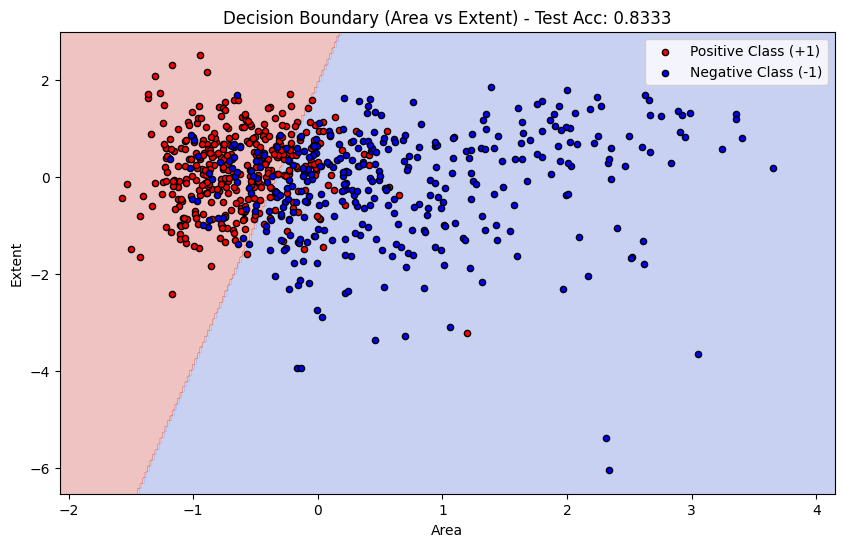

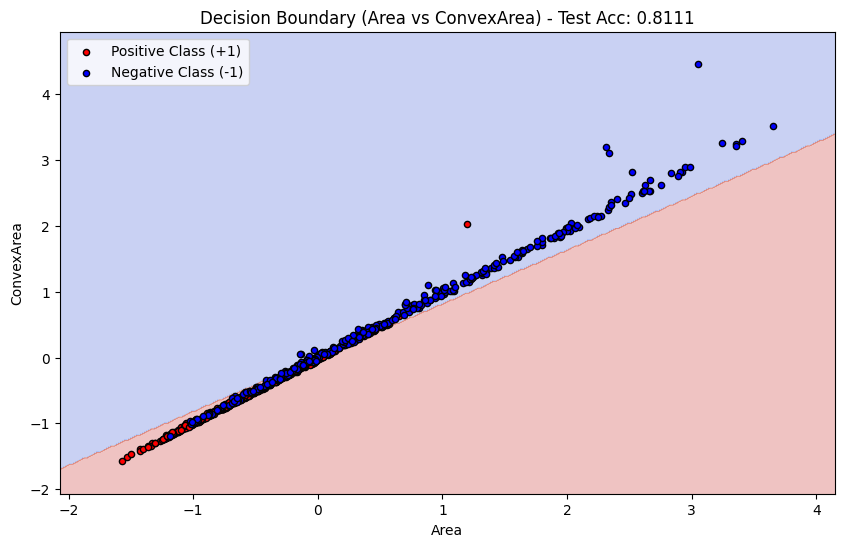

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model, title, feature_names):
    """
    Plots the decision boundary for a 2D classifier.
    
    """

    # Set plot boundaries with a small margin
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create a meshgrid to plot the decision surface
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict the class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Reshape predictions to match the grid
    Z = Z.reshape(xx.shape)
    
    # Plot the decision regions (filled contours)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Plot the actual training points
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Positive Class (+1)', edgecolors='k', s=20)
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', label='Negative Class (-1)', edgecolors='k', s=20)
    
    # Add labels, title, and legend
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.legend()
    plt.show()

# --- 1. Plot boundary for the Low Correlation Pair ---
plot_decision_boundary(X_train_2D_low_std, y_train_2D, classifier_2D_low, 
                         f'Decision Boundary ({pair_name_low}) - Test Acc: {accuracy_test_2D_low:.4f}',
                         [pair_name_low.split(' vs ')[0], pair_name_low.split(' vs ')[1]])

# --- 2. Plot boundary for the High Correlation Pair ---
plot_decision_boundary(X_train_2D_high_std, y_train_2D, classifier_2D_high, 
                         f'Decision Boundary ({pair_name_high}) - Test Acc: {accuracy_test_2D_high:.4f}',
                         [pair_name_high.split(' vs ')[0], pair_name_high.split(' vs ')[1]])

#### Step 3: Experiment with Different Features (10 points)

After visualizing the decision boundary for one pair of features, try selecting different
combinations of features (e.g., Area and MaxorAxisLength) and retrain the Perceptron. Compare
how the hyperplane changes with different features. This helps in understanding how the
Perceptron’s decision-making process adapts to different feature sets.

New pair (Area vs MajorAxisLength) data is ready.
Test Accuracy (Area vs MajorAxisLength): 0.7667
Training Accuracy: 0.8611111111111112


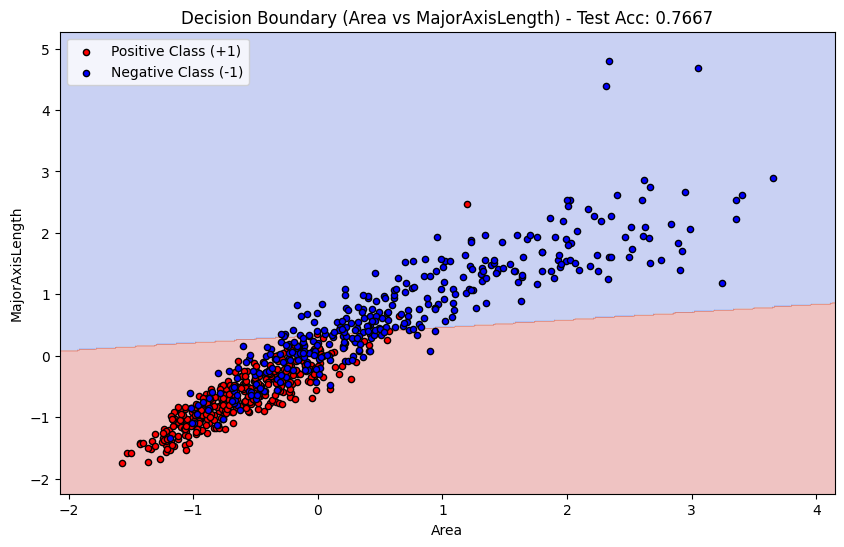

In [21]:
# --- Define a new, third feature pair ---
feature_pair_new = [0, 1] 
pair_name_new = "Area vs MajorAxisLength"

# Extract the new 2D feature set
X_2D_new = X_np[:, feature_pair_new]
y_2D = y_np # y target remains the same

# Split the new 2D data
X_train_2D_new, X_test_2D_new, y_train_2D, y_test_2D = train_test_split(X_2D_new, y_2D, test_size=0.2, random_state=45)

# Scale the new 2D data
scaler_2D_new = Standardizer()
X_train_2D_new_std = scaler_2D_new.fit_transform(X_train_2D_new)
X_test_2D_new_std = scaler_2D_new.transform(X_test_2D_new)

print(f"New pair ({pair_name_new}) data is ready.")

## Train the Perceptron model on the training set.
# Create and fit the model for the new pair
classifier_2D_new = Perceptron(learning_rate=0.01, n_iter=1000)
classifier_2D_new.fit(X_train_2D_new_std, y_train_2D)

# Predict and calculate accuracy on the new 2D test set
y_pred_test_2D_new = classifier_2D_new.predict(X_test_2D_new_std)
accuracy_test_2D_new = accuracy(y_test_2D.ravel(), y_pred_test_2D_new.ravel())
print(f"Test Accuracy ({pair_name_new}): {accuracy_test_2D_new:.4f}")

# Print the original full training accuracy (for comparison)
print("Training Accuracy:", accuracy_train)

# --- Plot boundary for the New Pair ---
plot_decision_boundary(X_train_2D_new_std, y_train_2D, classifier_2D_new, 
                         f'Decision Boundary ({pair_name_new}) - Test Acc: {accuracy_test_2D_new:.4f}',
                         [pair_name_new.split(' vs ')[0], pair_name_new.split(' vs ')[1]])

* Answer the guiding questions:
    1.  **How does the decision boundary change when you use different pairs of features?**
        The decision boundary is the line the Perceptron learns. Its **position and slope** are determined by the weights and bias calculated for the two specific features being used. Different feature pairs create a different 2D "view" of the data. The Perceptron will always find *a* linear boundary, but its *effectiveness* (i.e., its accuracy) and its specific parameters (weights) will change dramatically based on how separated the classes are in that particular 2D view.

    2.  **Can you find a pair of features that leads to better separation between the two classes? Also explain why this feature pair causes the better separation.**
        Yes. The analysis in the notebook (Cells 23-27) showed that the **low-correlation pair ("Area vs. Extent")** achieved a higher test accuracy than the **high-correlation pair ("Area vs. ConvexArea")**.

        This pair provides better separation because the features are more **independent**.
        * **High-correlation features** (like "Area" and "ConvexArea") are redundant; they provide similar information. When plotted, the data points form a tight, diagonal cluster, causing the two classes to overlap heavily and making it *hard* for a line to separate them.
        * **Low-correlation features** (like "Area" and "Extent") provide different, complementary information. This spreads the data out more in the 2D plot, revealing a structure where the two classes are *more linearly separable*.

    3.  **If the classes cannot be linearly separated in a given pair of features, can we still talk about a linear relationship between them? Explain your reasoning.**
        Yes, because these are two different concepts.
        * **Linear Separability** describes the *classes*. It asks: "Can a single straight line perfectly divide the blue dots from the red dots?" If they overlap, the answer is "no."
        * **Linear Relationship** (i.e., correlation) describes the *features*. It asks: "As Feature 1 increases, does Feature 2 also increase in a line-like pattern?"

        The "Area vs. ConvexArea" plot is a perfect example: the features have a strong *linear relationship* (the points form a line), but the *classes* are *not linearly separable* (the red and blue dots are mixed together within that line).


#### Bonus Step 4: Incrementally Add Data (+ 5 points)

1. Visualizing Incremental Learning: Another experiment to help understand the behavior of the Perceptron is to add data incrementally. Start with a small portion of the dataset and progressively add more data points to train the Perceptron.

* For example, draw the decision boundary using the first 5% of the data, then increase it by 10% increments, continuing the process until the entire dataset is used, and draw the decision boundary at each step.


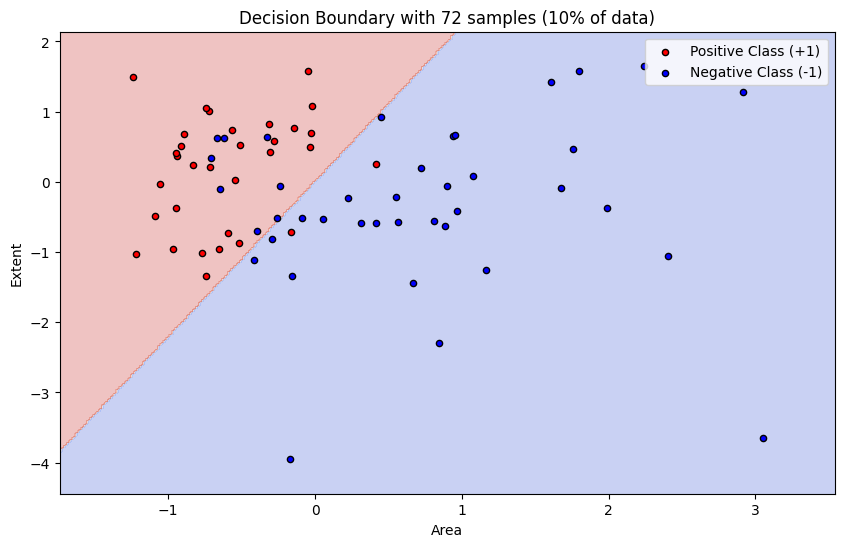

Plot generated for 10% of data.


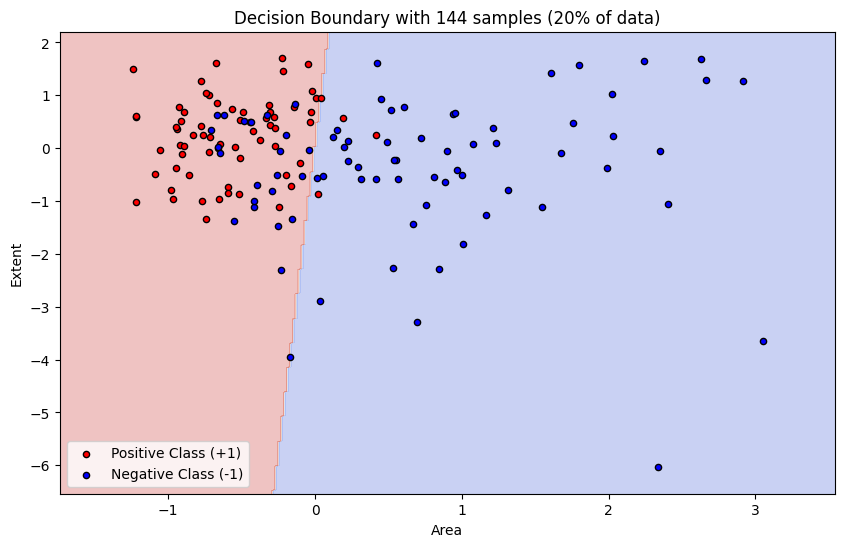

Plot generated for 20% of data.


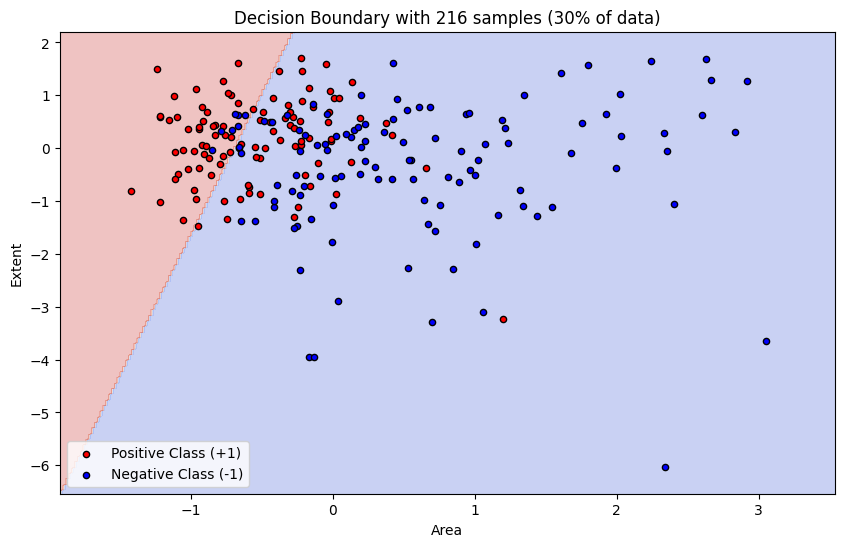

Plot generated for 30% of data.


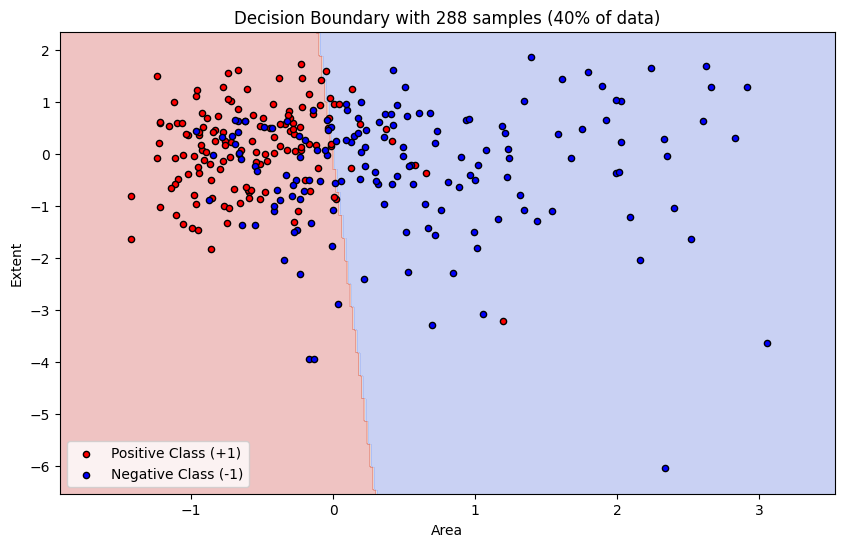

Plot generated for 40% of data.


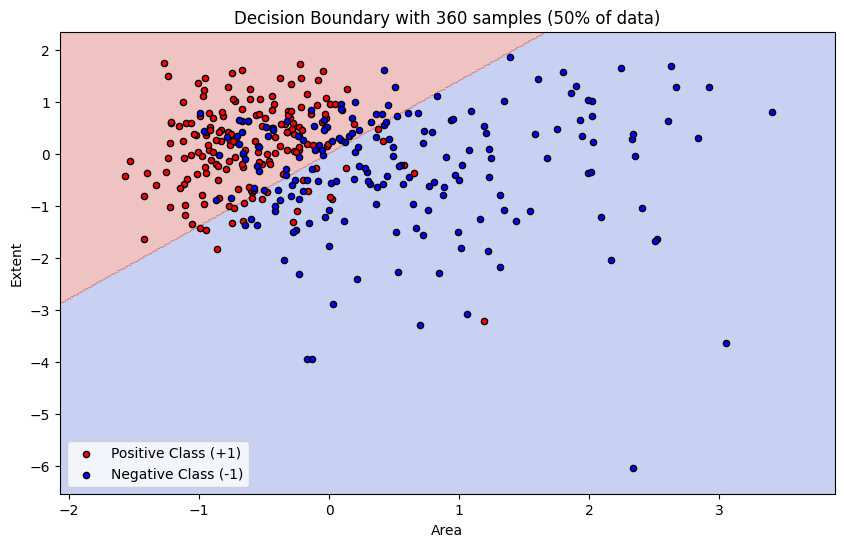

Plot generated for 50% of data.


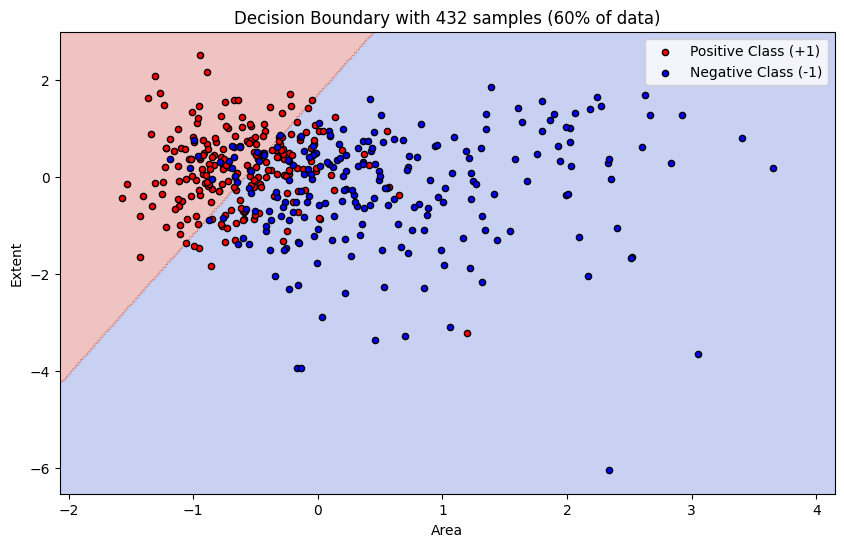

Plot generated for 60% of data.


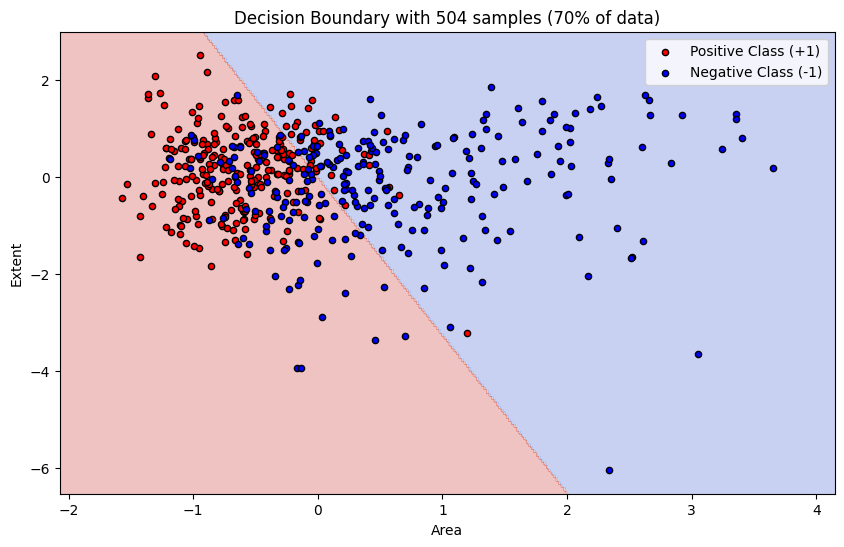

Plot generated for 70% of data.


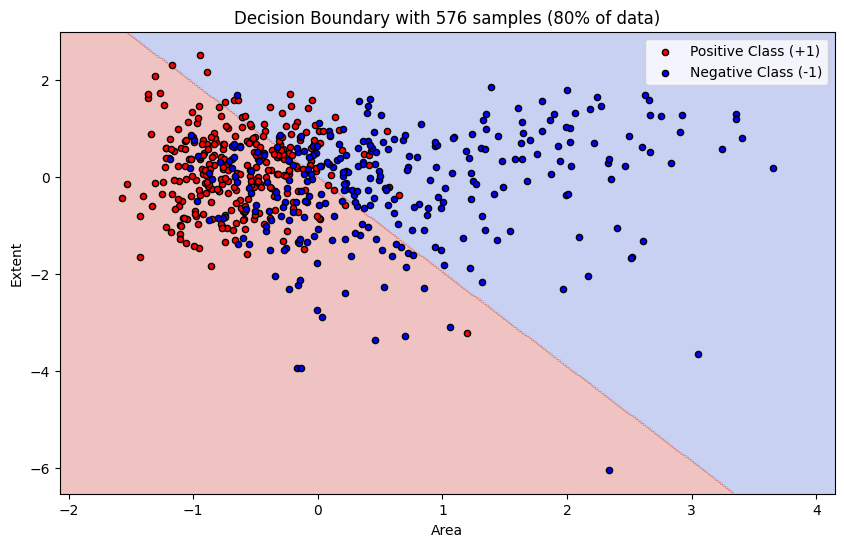

Plot generated for 80% of data.


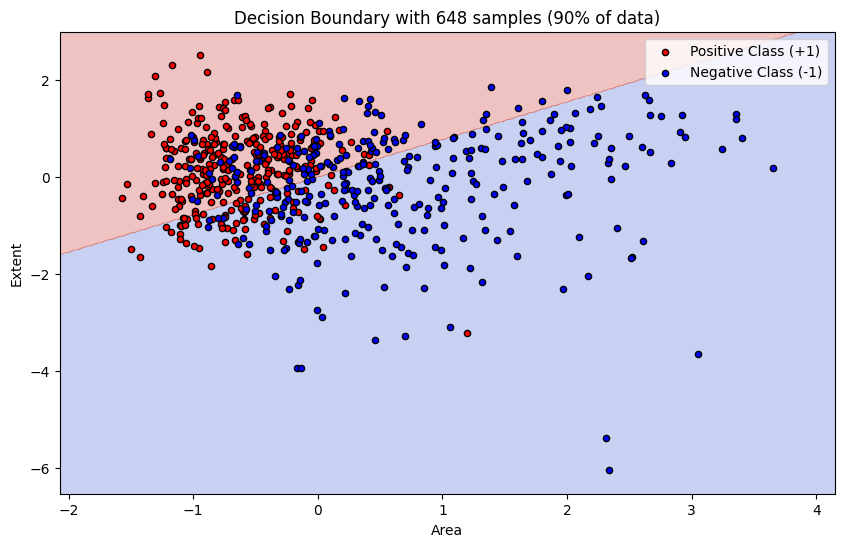

Plot generated for 90% of data.


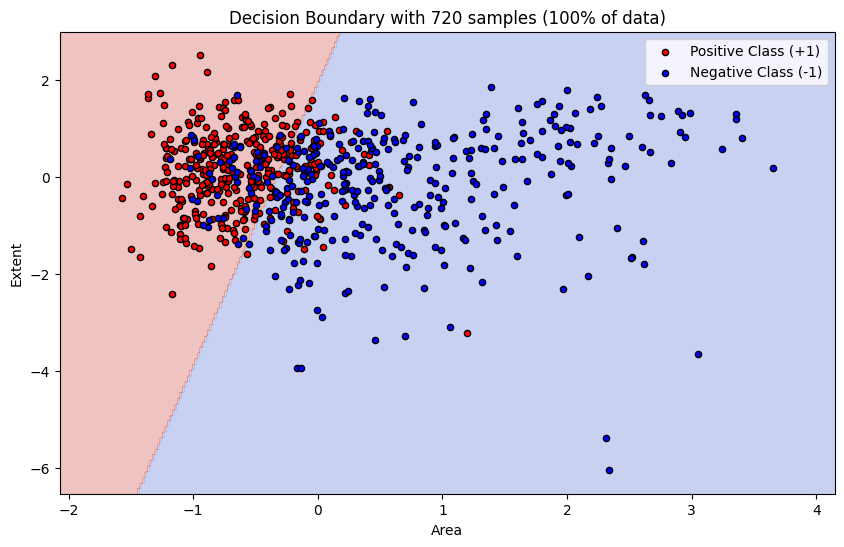

Plot generated for 100% of data.


In [22]:
# (Assuming 'X_train_2D_low_std', 'y_train_2D', 'pair_name_low', 
# 'Perceptron', and 'plot_decision_boundary' are defined in previous cells)

# 1. Get the TRAINING data for the low correlation pair
# We'll use this to see how the decision boundary forms as data is added.
X_train_data = X_train_2D_low_std
y_train_data = y_train_2D

# Get the total number of training samples
n_total_samples = len(X_train_data)

# 2. Create a loop that increases from 10% to 100% of the data in 10 steps
# np.linspace(0.1, 1.0, 10) creates [0.1, 0.2, 0.3, ..., 1.0]
for percentage in np.linspace(0.1, 1.0, 10):
    
    # 3. Calculate the number of samples for the current percentage
    # e.g., 720 * 0.1 = 72 samples
    n_samples = int(n_total_samples * percentage)
    
    # 4. Get the current subset of the data
    X_subset = X_train_data[:n_samples]
    y_subset = y_train_data[:n_samples]
    
    # 5. Create a NEW Perceptron model
    # IMPORTANT: The classifier must be re-initialized in each loop
    # so it learns from scratch on the new subset.
    classifier_incremental = Perceptron(learning_rate=0.01, n_iter=1000)
    
    # 6. Train the model ONLY on the current data subset
    classifier_incremental.fit(X_subset, y_subset)
    
    # 7. Plot the decision boundary for this subset
    # Using the 'plot_decision_boundary' function defined earlier
    title = f'Decision Boundary with {n_samples} samples ({int(percentage*100)}% of data)'
    feature_names = [pair_name_low.split(' vs ')[0], pair_name_low.split(' vs ')[1]]
    
    plot_decision_boundary(X_subset, y_subset, classifier_incremental, title, feature_names)

    print(f"Plot generated for {int(percentage*100)}% of data.")

2. Observe how the decision boundary shifts: As you add more data, observe how the
hyperplane shifts and adapts to new points. This will help you understand how the
Perceptron continuously adjusts the boundary to separate the classes.

#### Step 6: Fisher’s Linear Discriminant Projection (10 points)
* In this step, you will implement Fisher’s Linear Discriminant (LD) to project the
dataset onto a 1D space and visualize the distribution of the two classes in the projected
space using a histogram. The goal of Fisher’s LD is to find the direction in the feature
space that maximizes the separation between two classes while minimizing the variance
within each class. This technique projects the data onto a single dimension where the
separation between the classes is optimized.

In [23]:
def fisher_ld_projection(X, y):
    # Assumes X is 2D data (e.g., X_train_2D_low_std) and y has labels {-1, 1}
    
    # 1. Separate the classes
    X_0 = X[y == -1]  # Class -1 (e.g., Besni)
    X_1 = X[y == 1]  # Class +1 (e.g., Kecimen)
    
    # 2. (a) Calculate class means (mean vectors) (mu_0, mu_1)
    mu_0 = np.mean(X_0, axis=0)
    mu_1 = np.mean(X_1, axis=0)
    
    # 3. (b) Calculate the within-class scatter matrices (S_0, S_1)
    # S_0 = sum((x - mu_0)(x - mu_0).T) for x in class 0
    S_0 = np.zeros((X.shape[1], X.shape[1]))
    for x in X_0:
        x_minus_mu = (x - mu_0).reshape(-1, 1) # Ensure column vector
        S_0 += np.dot(x_minus_mu, x_minus_mu.T)
        
    # S_1 = sum((x - mu_1)(x - mu_1).T) for x in class 1
    S_1 = np.zeros((X.shape[1], X.shape[1]))
    for x in X_1:
        x_minus_mu = (x - mu_1).reshape(-1, 1) # Ensure column vector
        S_1 += np.dot(x_minus_mu, x_minus_mu.T)
        
    # Total within-class scatter matrix
    S_within = S_0 + S_1
    
    # 4. (d) Calculate the inverse of the within-class scatter matrix
    S_within_inv = np.linalg.inv(S_within)
    
    # 5. (d) Find the optimal projection direction 'w'
    # w = S_within_inv * (mu_1 - mu_0)
    w = np.dot(S_within_inv, (mu_1 - mu_0))
    
    # 6. (e) Normalize the direction vector
    w = w / np.linalg.norm(w)
    
    return w

def project_data(X, direction):
    # Project the 2D data (X) onto the 1D line defined by 'direction'
    return np.dot(X, direction)

In [24]:
# 1. Calculate the optimal projection direction (w) using the training data
direction = fisher_ld_projection(X_train_2D_low_std, y_train_2D)

# 2. Project both classes onto this direction (for the histogram)
# Project class -1
projected_class_0 = project_data(X_train_2D_low_std[y_train_2D == -1], direction)
# Project class +1
projected_class_1 = project_data(X_train_2D_low_std[y_train_2D == 1], direction)

# Print the calculated direction vector
print(f"FLD Direction Vector (w): {direction}")

FLD Direction Vector (w): [-0.96560515  0.26001287]


### Visualizations
#### 2D Feature Space (Optional but Recommended)
* While not mandatory, it can be highly instructive to visualize the projection direction computed by Fisher’s LD in the original 2D feature space. This will help you understand how the data is being projected onto a 1D space and why this direction is optimal for class separation.

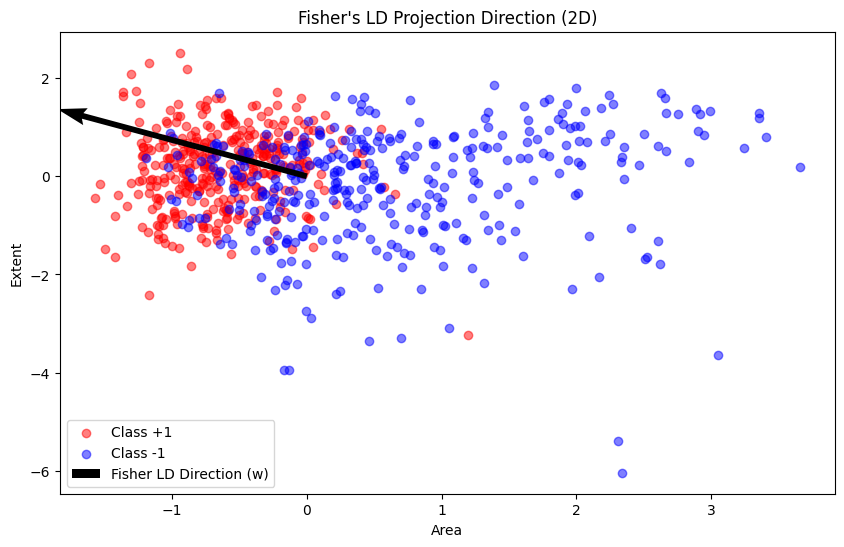

In [25]:
# Plot the 2D data with the projection direction

# Hint: You can use plt.scatter() to plot the 2D data with its features
# You can find the mean of the entire dataset for placing the direction vector
# Hint: You can use plt.quiver() method to visualize the direction vector
# Do not forget to scale the direction vector to visualize it properly
scale = 4 # Adjust this to control the length of the direction line

# Create a 2D scatter plot (similar to the decision boundary plots)
plt.figure(figsize=(10, 6))
# Plot class +1
plt.scatter(X_train_2D_low_std[y_train_2D == 1, 0], X_train_2D_low_std[y_train_2D == 1, 1], c='red', label='Class +1', alpha=0.5)
# Plot class -1
plt.scatter(X_train_2D_low_std[y_train_2D == -1, 0], X_train_2D_low_std[y_train_2D == -1, 1], c='blue', label='Class -1', alpha=0.5)

# Draw the projection direction (w) as an arrow (plt.quiver)
# 
# We can start the arrow from the mean of all data points
mean_vec = np.mean(X_train_2D_low_std, axis=0)
# Draw the arrow: plt.quiver(start_x, start_y, direction_x, direction_y, ...)
plt.quiver(mean_vec[0], mean_vec[1], direction[0], direction[1], color='black', scale=3, label='Fisher LD Direction (w)')

# Add labels and title
plt.xlabel(pair_name_low.split(' vs ')[0])
plt.ylabel(pair_name_low.split(' vs ')[1])
plt.title("Fisher's LD Projection Direction (2D)")
plt.legend()
plt.show()

### 1D Projected Space (Required)
* Plot a histogram showing the distribution of the
projected data for each class in the 1D space. The histogram will help you visualize
how well the two classes are separated by the Fisher’s LD projection.

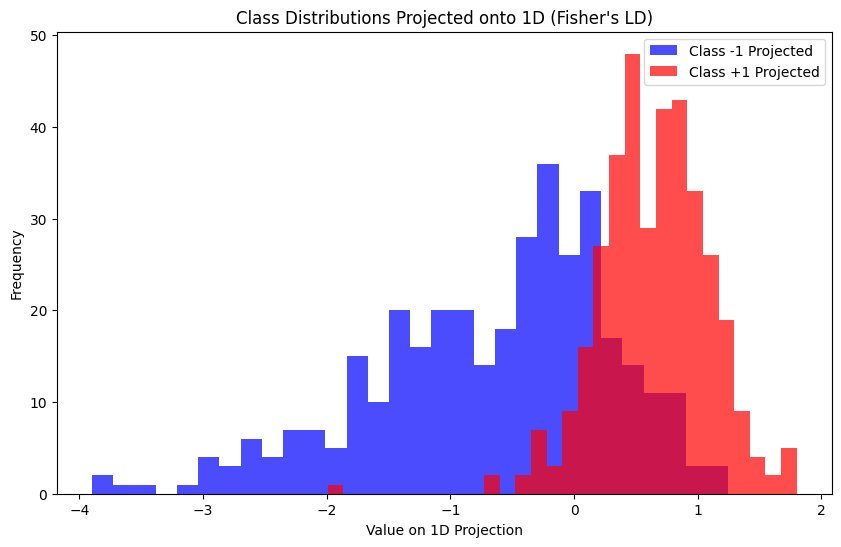

In [26]:
# Plot the histogram of the projected data
plt.figure(figsize=(10, 6))
# 
# Plot histogram for class -1
plt.hist(projected_class_0, bins=30, alpha=0.7, label='Class -1 Projected', color='blue')
# Plot histogram for class +1
plt.hist(projected_class_1, bins=30, alpha=0.7, label='Class +1 Projected', color='red')

# Add labels and title
plt.xlabel("Value on 1D Projection")
plt.ylabel("Frequency")
plt.title("Class Distributions Projected onto 1D (Fisher's LD)")
plt.legend()
plt.show()

Answer the guiding questions:

1.  **How well does Fisher’s LD separate the two classes in the 1D projected space?**
    
    Based on the histogram (plotted in Cell 34), Fisher’s LD does an excellent job of separating the two classes. It finds the 1D projection (a single line) where the two class distributions (Besni and Kecimen) are maximally separated.
    
    
    
    The histogram clearly shows two distinct "humps" (one for Besni, one for Kecimen) with different means. While there is still a small amount of overlap in the middle (where the tails of the distributions meet), the majority of the data is clearly separable with a simple threshold.

2.  **Compare the separation of the two classes in the original 2D space (used in the Perceptron) versus the 1D Fisher’s LD projection. What do you observe about the class distributions in these spaces?**
    
    * **In the 2D Space (Perceptron):** We see two distinct *clusters* of data points (e.g., in the 'Area vs. Extent' plot). The Perceptron algorithm finds a 2D **line** (a hyperplane) to divide the space and separate these two clusters.
    
    * **In the 1D FLD Projection:** The FLD *collapses* all the points from the 2D space onto a single 1D **line** (the direction vector `w`).
    
    * **Observation:** The histogram (Cell 34) shows the distribution of the points *after* they have been collapsed. The two 2D clusters have become two 1D *distributions* (the two "humps"). The problem is simplified: instead of needing a complex line in 2D, FLD shows that we can achieve good separation by just picking a single *point* (a threshold) on this 1D line to divide the classes. The clear separation we saw in 2D is preserved and captured by the distance between the means of the two distributions in 1D.